In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
''' load and view the data '''
data = pd.read_csv("../csv/suicide.csv", index_col = 0)
# calculate the suicide rate
data["suicides_per_100k"] = (data["suicides_no"] / data["population"]) * 100000
data

,country,year,sex,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation,continent,suicides_per_100k
1,Albania,1987,Male,15-24,21,312900.0,2.156625e+09,796,Generation X,Europe,6.711409
2,Albania,1987,Male,35-54,16,308000.0,2.156625e+09,796,Silent,Europe,5.194805
3,Albania,1987,Female,15-24,14,289700.0,2.156625e+09,796,Generation X,Europe,4.832585
4,Albania,1987,Male,75+,1,21800.0,2.156625e+09,796,G.I. Generation,Europe,4.587156
5,Albania,1987,Male,25-34,9,274300.0,2.156625e+09,796,Boomers,Europe,3.281079
...,...,...,...,...,...,...,...,...,...,...,...
27656,Uzbekistan,2014,Female,35-54,107,3620833.0,6.306708e+10,2309,Generation X,Asia,2.955121
27657,Uzbekistan,2014,Female,75+,9,348465.0,6.306708e+10,2309,Silent,Asia,2.582756
27658,Uzbekistan,2014,Male,5-14,60,2762158.0,6.306708e+10,2309,Generation Z,Asia,2.172215
27659,Uzbekistan,2014,Female,5-14,44,2631600.0,6.306708e+10,2309,Generation Z,Asia,1.671987


## 1.
From the EDA we saw that European countries commit the most suicides. But that could be because of the fact that we have more European data than Asian data. I personally would like to know
whether the medias are right when they say that Asian countries commit more suicides or do European countries just not have enough attention. In the past 30 years or so at least.
Denote the suicide rate of Asia per 100k people as \mu_a and the suicide rate of Europe as \mu_b.

# H_0: \mu_a >= \mu_b
# H_1: \mu_a < \mu_b
# \alpha = 0.05

We are going to use the paired one tailed t-test (welchs test) with different standard deviations. The normality assumptions are met since by the central limit theorem the means of means follow the normal distribution. 

In [3]:
asia = data[data["continent"] == "Asia"]
eu = data[data["continent"] == "Europe"]
# do a two tailed welchs test and since student's distribution is symmetric we can easily convert the two tailed output into a one tailed output
t, pval = stats.ttest_ind(asia["suicides_per_100k"], eu["suicides_per_100k"], equal_var=False)
print(t, pval)

# We want the right one tailed test
one_tail_pval = 0.5*pval
print(one_tail_pval)

-20.00469504234876 1.120913788950784e-87
5.60456894475392e-88


# As our pvalue is super low, we reject the null hypothesis and conclude by saying that Asia committed less suicides than Europe.

## 2.
After seeing the nice non-intersected line graph of the age suicide rates, one can clearly say there is a difference between committing suicides for the youngest people and the eldest people. I'd like to find out whether there is a difference in suicide rates between the middle groups though (25-74). 
25-34 label 0
35-54 label 1
55-74 label 2
# H_0: \mu_0 = \mu_1 = \mu_2
# H_1: \mu_i != \mu_j, for at least one pair (i,j) where i != j
# \alpha = 0.05
We know that we have enough samples for each group from the pandas profiling - 4610 per age group

In [4]:
mid25 = data[data["age"] == "25-34"] 
mid35 = data[data["age"] == "35-54"]
mid55 = data[data["age"] == "55-74"]
mid25

,country,year,sex,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation,continent,suicides_per_100k
5,Albania,1987,Male,25-34,9,274300.0,2.156625e+09,796,Boomers,Europe,3.281079
8,Albania,1987,Female,25-34,4,257200.0,2.156625e+09,796,Boomers,Europe,1.555210
20,Albania,1988,Female,25-34,5,262400.0,2.126000e+09,769,Boomers,Europe,1.905488
21,Albania,1988,Male,25-34,5,279900.0,2.126000e+09,769,Boomers,Europe,1.786352
26,Albania,1989,Male,25-34,18,283600.0,2.335125e+09,833,Boomers,Europe,6.346968
...,...,...,...,...,...,...,...,...,...,...,...
27631,Uzbekistan,2012,Female,25-34,148,2556673.0,5.182157e+10,1964,Millenials,Asia,5.788773
27638,Uzbekistan,2013,Male,25-34,328,2644648.0,5.769045e+10,2150,Millenials,Asia,12.402407
27643,Uzbekistan,2013,Female,25-34,146,2647820.0,5.769045e+10,2150,Millenials,Asia,5.513970
27650,Uzbekistan,2014,Male,25-34,318,2739150.0,6.306708e+10,2309,Millenials,Asia,11.609441


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7F4B91978>]],
      dtype=object)

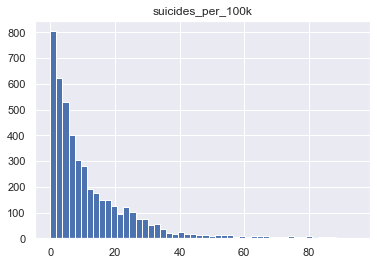

In [10]:
''' ANOVA test assumption check '''
# 1. data normality - all groups dependant variable must have a normal distribution
sns.set()
mid25.hist("suicides_per_100k", bins=50)
# Our data are not normal, therefore we do not meet the normality assumption. 
# From the lectures we were advised to use the non parametric Kruskal Wallis test if the anova assumptions are not met.
# Therefore our hypothesis change from same means to same populations as according to the Kruskal Wallis test

ShapiroResult(statistic=0.9730758666992188, pvalue=1.2566254738064366e-28)


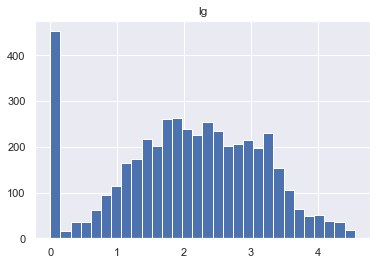

In [11]:
''' Here we try to see if the normality assumption could be met if we transformed the suicides_per_100k using log, since the histogram of the suicides looks like a log normal distribution. 
After transforming we then perform a normality test which we reject, therefore log transforming does not make the data normal and we cannot use the ANOVA test.'''
new_mid = mid25.copy()
new_mid["lg"] = np.log(new_mid["suicides_per_100k"] + 1) # we cannot logarithm 0
new_mid.hist("lg", bins= 30)
print(stats.shapiro(new_mid["lg"]))

In [7]:
'''Perform the Kruskal Wallis test'''
t, pval = stats.kruskal(mid25["suicides_per_100k"], mid35["suicides_per_100k"], mid55["suicides_per_100k"])
print(pval)

4.717197484404153e-23


# We reject our null hypothesis since our pvalue is less than 0.05 i.e. there is a significant difference between each of the middle age groups.

## 3.
As seen in the EDA, of my own interest, I'd like to see if the Koreans commit suicides as much as the Japanese. I will however take only the years from 1995 to 2015. The reason is that Korea has probably evolved in the last few years which means they worked harder and that is why its suicide rates increased just in the recent years. The breakpoint is in 2005. So I wanted to create an equal interval from 2005 +- 10. 

As said in EDA, both of these countries made it to the top 20 countries with the highest suicide rates. Korea has a sharp increase in the last few years. Did the last few make Korea join the top 20 groups or is it instead closing the gap between Korea and Japan. If we had a dataset with the next few years, would the suicide rates still drop? The graphs look very correlated as in they somewhat increase and decrease together.

# H_0: \mu_kor = \mu_jap
# H_1: \mu_kor != \mu_jap
# \alpha = 0.05

here a simple two tailed t test should do.

In [8]:
'''filter the data and perform the test'''
dated_data = data[data["year"].between(1995,2015)]
kor = dated_data[dated_data["country"] == "Republic of Korea"]
jap = dated_data[dated_data["country"] == "Japan"]
t, pval = stats.ttest_ind(kor["suicides_per_100k"], jap["suicides_per_100k"], equal_var=False)
print(t, pval)

3.958308310583399 9.193471453859677e-05


In [9]:
''' Do the test without filtering the years for comparison '''
kor = data[data["country"] == "Republic of Korea"]
jap = data[data["country"] == "Japan"]
t, pval = stats.ttest_ind(kor["suicides_per_100k"], jap["suicides_per_100k"], equal_var=False)
print(t, pval)

1.820434710962452 0.06922475082340443


# As I thought, the years 1985-95 make a statistically significant difference in the suicide rate. We can succesfully reject the null hypothesis, hence we know that Koreans and Japanese have different suicide rates. Although, if we would follow the same steps as in the first hypothesis, we would conclude that the Japanese have a higher suicide rate, thus the last 10 years or so do not flip the suicide rate gap.